In [138]:
import librosa as lr
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import logging

from torch.utils.data import Dataset, DataLoader
from matplotlib import pyplot



class VoiceSamples(Dataset):
    
    def __init__(self, core_name, samples_path=None, Automatic=None):
        
        self.Log = logging.getLogger()
        logging.basicConfig(level=logging.INFO)
        
        self.core_name = core_name
        self.samples_path = samples_path
        
        self.soundSamples = []
        self.sampleRate = []
        
        self.chopedSamples = []
        self.chopedSr = []
        
        
        self.info = " VoiceSamples Object successfully created "
        self.Log.info(self.info)
        
        if Automatic:
            self.LoadSoundSamples()
            self.ChopToOneSecFragments()
        
        
    def __len__(self):
        try:
            if len(self.chopedSamples) == len(self.chopedSr):
                return len(self.chopedSamples)
            else:
                self.Log.warning("Lists: sundSamples and sampleRate are not equal!")
                
        except Exception as e:
            self.Log.exception("Unexpected error" + e)
    
    def __getitem__(self, idx):
        return self.chopedSamples[idx], self.chopedSr[idx]
    

    def LoadSoundSamples(self):
    
        n = 1

        while(True):
            try:
                if  self.samples_path:
                    path =  self.samples_path + self.core_name + str(n)
                else:
                    path = self.core_name + str(n)

                soundSample, sampleRate = lr.load(path)

                n += 1
                self.soundSamples.append(soundSample)
                self.sampleRate.append(sampleRate) 

                self.info = " Sample : " + path + " : successfully added"
                self.Log.info(self.info)

            except FileNotFoundError:
                if self.soundSamples:
                    self.info = "That's the end of database : " + str(n-1) + " : Samples added"
                    self.Log.info(self.info)
                    n = 0
                    
                    return self.soundSamples, self.sampleRate

                else:
                    self.Log.exception("Files are missing")
                    n = 0

                break

            except Exception as ex:      
                self.Log.exception("Unexpected error")
                break
        
    def getSoundSample(self, idx):
        return self.soundSamples[idx], self.sampleRate[idx]
    
    def getSoundSampleLen(self):
        try:
            if len(self.soundSamples) == len(self.sampleRate):
                return len(self.soundSamples)
            else:
                self.Log.warning("Lists: sundSamples and sampleRate are not equal!")
                
        except Exception as e:
            self.Log.exception("Unexpected error" + e)
    
    def ChopToOneSecFragments(self):
        try:
            if len(self.soundSamples) == len(self.sampleRate):
                for idx in range(len(self.soundSamples)):
                    
                    soundSample = self.soundSamples[idx]
                    sr = self.sampleRate[idx]
                    
                    frag_max = math.trunc(len(soundSample)/float(sr))
                    step = math.trunc(sr/2);
                    last_sample = len(soundSample)

                    for frag in range(frag_max*2):
                        start = step * frag
                        stop = start + sr
                        if sr<len(soundSample):
                            self.chopedSamples.append(soundSample[start:stop])
                            self.chopedSr.append(sr)
                            self.info = "Sample " + str(idx) + " : " + str(frag+1) + " : successfully choped and added"
                            self.Log.info(self.info)
                        else:
                            self.Log.warning("Something went wrong")

                     # incuding samples cuted by math.trunc() 
                    self.chopedSamples.append(soundSample[last_sample-sr:last_sample])
                    self.chopedSr.append(sr)
                    self.info = "Sample " + str(idx) + " : " + str(frag_max*2+1) + " : successfully choped and added"
                    self.Log.info(self.info)

                
                return self.chopedSamples, self.chopedSr 
                    
            else:
                self.Log.warning("Lists: sundSamples and sampleRate are not equal!")
                
        except Exception as e:
            self.e = "Unexpected error : " + str(e)
            self.Log.exception(self.e)
            
        def getChoped(self):
            #DOTO:
            pass
        
        def getChopedLen(self):
            #DOTO:
            pass
        
        def ChopedSignalToMelgram(self):
            #TODO:
            pass
        
        def MelgramToTensor(self):
            #TODO:
            pass


In [139]:
vs = VoiceSamples("vs", Automatic=True)
#vs.LoadSoundSamples()

INFO:root: VoiceSamples Object successfully created 
/home/krys/.local/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
INFO:root: Sample : vs1 : successfully added
/home/krys/.local/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
INFO:root: Sample : vs2 : successfully added
/home/krys/.local/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
INFO:root:That's the end of database : 2 : Samples added
INFO:root:Sample 0 : 1 : successfully choped and added
INFO:root:Sample 0 : 2 : successfully choped and added
INFO:root:Sample 0 : 3 : successfully choped and added
INFO:root:Sample 0 : 4 : successfully choped

In [117]:
vs.LoadSoundSamples()

/home/krys/.local/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
INFO:root: Sample : vs1 : successfully added
/home/krys/.local/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
INFO:root: Sample : vs2 : successfully added
/home/krys/.local/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
INFO:root:That's the end of database : 2 : Samples added


([array([-9.0211279e-06, -8.3625609e-06,  2.4894875e-06, ...,
         -5.7567819e-04, -1.1265196e-03,  0.0000000e+00], dtype=float32),
  array([-9.0211279e-06, -8.3625609e-06,  2.4894875e-06, ...,
         -5.7567819e-04, -1.1265196e-03,  0.0000000e+00], dtype=float32)],
 [22050, 22050])

In [118]:
vs.ChopToOneSecFragments()



INFO:root:Sample 0 : 1 : successfully choped and added
INFO:root:Sample 0 : 2 : successfully choped and added
INFO:root:Sample 0 : 3 : successfully choped and added
INFO:root:Sample 0 : 4 : successfully choped and added
INFO:root:Sample 0 : 5 : successfully choped and added
INFO:root:Sample 0 : 6 : successfully choped and added
INFO:root:Sample 0 : 7 : successfully choped and added
INFO:root:Sample 0 : 8 : successfully choped and added
INFO:root:Sample 0 : 9 : successfully choped and added
INFO:root:Sample 0 : 10 : successfully choped and added
INFO:root:Sample 0 : 11 : successfully choped and added
INFO:root:Sample 0 : 12 : successfully choped and added
INFO:root:Sample 0 : 13 : successfully choped and added
INFO:root:Sample 0 : 14 : successfully choped and added
INFO:root:Sample 0 : 15 : successfully choped and added
INFO:root:Sample 0 : 16 : successfully choped and added
INFO:root:Sample 0 : 17 : successfully choped and added
INFO:root:Sample 0 : 18 : successfully choped and added
I

([array([-9.0211279e-06, -8.3625609e-06,  2.4894875e-06, ...,
         -1.0622420e-02, -1.6972359e-02,  1.6822658e-02], dtype=float32),
  array([-0.00194879, -0.00068193, -0.00245428, ...,  0.01520102,
          0.01468057,  0.01259168], dtype=float32),
  array([-0.03418208, -0.00879554, -0.01807239, ..., -0.02344353,
          0.0298007 , -0.06570384], dtype=float32),
  array([ 0.01357524,  0.01528991,  0.01594397, ..., -0.00325981,
         -0.0023006 , -0.00123248], dtype=float32),
  array([ 0.05995398, -0.00697324, -0.01984474, ...,  0.00083964,
          0.00151303,  0.00122029], dtype=float32),
  array([ 0.00035423,  0.00133809,  0.00056437, ..., -0.01852075,
         -0.02204792, -0.02348538], dtype=float32),
  array([0.00118243, 0.00102122, 0.00081286, ..., 0.00235809, 0.00219568,
         0.0023094 ], dtype=float32),
  array([-0.02887203, -0.02913514, -0.03332943, ..., -0.00565581,
         -0.00557311, -0.00541226], dtype=float32),
  array([0.00148358, 0.00112718, 0.00042259,

In [112]:
print(vs[0])



(array([-9.0211279e-06, -8.3625609e-06,  2.4894875e-06, ...,
       -1.0622420e-02, -1.6972359e-02,  1.6822658e-02], dtype=float32), 22050)


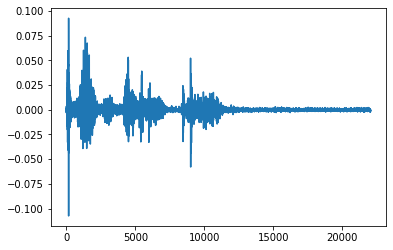

In [133]:

smpl , sr = vs[33]
pyplot.plot(smpl)

In [37]:
import librosa as lr
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import logging

from torch.utils.data import Dataset, DataLoader
from matplotlib import pyplot

 
logging.basicConfig(level=logging.INFO)
Log = logging.getLogger()

In [ ]:
class SoundSamples():
    

In [32]:
def LoadSoundSamples(coreName, samplesPath=None):
    
    n = 1
    soundSamples = [],[]
    
    while(True):
        try:
            if samplesPath:
                path = samplesPath + coreName + str(n)
            else:
                path = coreName + str(n)
                
            soundSample, sr = lr.load(path)
            
            n += 1
            soundSamples[0].append(soundSample)
            soundSamples[1].append(sr) 
            
            info = " Sample : " + path + " : successfully added"
            Log.info(info)
            
        except FileNotFoundError:
            if soundSamples[0]:
                info = "That's the end of database : " + str(n-1) + " : Samples added"
                Log.info(info)
                
                return soundSamples
            
            else:
                Log.exception("Files are missing")

            break
             
        except Exception as ex:      
            Log.exception("Unexpected error")
            break
            
            
            

In [33]:
def ChopToOneSecFragments(soundSample):
    
    soundSamples[0].append(soundSample)
    soundSamples[1].append(sr) 
    
    chopedSoundSamples = [],[]
    
    frag_max = math.trunc(len(soundSample)/float(sr))
    step = math.trunc(sr/2);
    last_sample = len(soundSample)
      
    for frag in range(frag_max*2):
        start = step * frag
        stop = start + sr
        if sr<len(soundSample):
            chopedSoundSamples[0].append(soundSample[start:stop])
            chopedSoundSamples[1].append(sr)
            info = "Sample : " + str(frag+1) + " : successfully choped and added"
            Log.info(info)
        else:
            Log.warning("Something went wrong")
        
     # incuding samples cuted by math.trunc() 
    chopedSoundSamples[0].append(soundSample[last_sample-sr:last_sample])
    chopedSoundSamples[1].append(sr)
    info = "Sample : " + str(frag_max*2+1) + " : successfully choped and added"
    Log.info(info)
            
    return chopedSoundSamples

In [ ]:
def AllChoped()

In [35]:
sampleList = LoadSoundSamples("vs")
if(sampleList!=None):
    s_sample = sampleList[0][0]
    s_sr = sampleList[1][0] 
OneSecSamples =  ChopToOneSecFragments(s_sample, s_sr)
print(len(OneSecSamples))


/home/krys/.local/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
INFO:root: Sample : vs1 : successfully added
/home/krys/.local/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
INFO:root: Sample : vs2 : successfully added
/home/krys/.local/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
INFO:root:That's the end of database : 2 : Samples added
INFO:root:Sample : 1 : successfully choped and added
INFO:root:Sample : 2 : successfully choped and added
INFO:root:Sample : 3 : successfully choped and added
INFO:root:Sample : 4 : successfully choped and added
INFO:root:Sample : 5 : successfully choped and add

2


In [40]:
print(len(OneSecSamples[0]))

19


In [67]:
def Tabbb():
    t = 4
    g = 7
    return t,g

h = Tabbb()

print(h)

(4, 7)
